## Learning Algorithms - Unsupervised Learning
<img src='imgs/ml_process_by_micheleenharris.png' alt="Smiley face" width="400"><br>
>  Reminder:  In machine learning, the problem of unsupervised learning is that of trying to find hidden structure in unlabeled data. Since the training set given to the learner is unlabeled, there is no error or reward signal to evaluate a potential solution. Basically, we are just finding a way to represent the data and get as much information from it that we can.

HEY!  Remember PCA from above?  PCA is actually considered unsupervised learning.  We just put it up there because it's a good way to visualize data at the beginning of the ML process.

Let's revisit it in a little more detail using the `iris` dataset.

In [ ]:
# Imports for python 2/3 compatibility

from __future__ import absolute_import, division, print_function, unicode_literals

# For python 2, comment these out:
# from builtins import range

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### PCA revisited

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()

# subset data to have only sepal width (cm) and petal length (cm) for simplification
X = iris.data[:, 1:3]
print(iris.feature_names[1:3])

pca = PCA(n_components = 2)
pca.fit(X)

print("% of variance attributed to components: "+ \
      ', '.join(['%.2f' % (x * 100) for x in pca.explained_variance_ratio_]))
print('\ncomponents of each feature:', pca.components_)

print(list(zip(pca.explained_variance_, pca.components_)))

The `pca.explained_variance_` is like the magnitude of a components influence (amount of variance explained) and the `pca.components_` is like the direction of influence for each feature in each component.

<p style="text-align:right"><i>Code in next cell adapted from Jake VanderPlas's code [here](https://github.com/jakevdp/sklearn_pycon2015)</i></p>

In [ ]:
# plot the original data in X (before PCA)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)

# grab the component means to get the center point for the plot below
means = pca.mean_

# here we use the direction of the components in pca.components_
#  and the magnitude of the variance explained by that component in
#  pca.explained_variance_

# we plot the vector (magnitude and direction) of the components
#  on top of the original data in X
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print([means[0], v[0]+means[0]], [means[1], v[1]+means[1]])
    plt.plot([means[0], v[0]+means[0]], [means[1], v[1]+means[1]], '-k', lw=3)


# axis limits
plt.xlim(0, max(X[:, 0])+3)
plt.ylim(0, max(X[:, 1])+3)

# original feature labels of our data X
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

QUESTION:  In which direction in the data is the most variance explained?

Recall, in the ML 101 module: unsupervised models have a `fit()`, `transform()` and/or `fit_transform()` in `sklearn`.


If you want to both get a fit and new dataset with reduced dimensionality, which would you use below? (Fill in blank in code)

In [ ]:
# get back to our 4D dataset
X, y = iris.data, iris.target

pca = PCA(n_components = 0.95) # keep 95% of variance
X_trans = pca.___(X) # <- fill in the blank
print(X.shape)
print(X_trans.shape)

In [ ]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=iris.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('spring', 10))
plt.ylabel('Component 2')
plt.xlabel('Component 1')

### Clustering
KMeans finds cluster centers that are the mean of the points within them.  Likewise, a point is in a cluster because the cluster center is the closest cluster center for that point.


> If you don't have ipywidgets package installed, go ahead and install it now by running the cell below uncommented.

In [ ]:
!pip install ipywidgets

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from ipywidgets import interact
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components = 2) # keep 2 components which explain most variance
X = pca.fit_transform(X)

X.shape

In [ ]:
# I have to tell KMeans how many cluster centers I want
n_clusters  = 3

# for consistent results when running the methods below
random_state = 2

<p style="text-align:right"><i>Code in next cell adapted from Jake VanderPlas's code [here](https://github.com/jakevdp/sklearn_pycon2015)</i></p>

In [ ]:
def _kmeans_step(frame=0, n_clusters=n_clusters):
    rng = np.random.RandomState(random_state)
    labels = np.zeros(X.shape[0])
    centers = rng.randn(n_clusters, 2)

    nsteps = frame // 3

    for i in range(nsteps + 1):
        old_centers = centers
        if i < nsteps or frame % 3 > 0:
            dist = euclidean_distances(X, centers)
            labels = dist.argmin(1)

        if i < nsteps or frame % 3 > 1:
            centers = np.array([X[labels == j].mean(0)
                                for j in range(n_clusters)])
            nans = np.isnan(centers)
            centers[nans] = old_centers[nans]


    # plot the data and cluster centers
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow',
                vmin=0, vmax=n_clusters - 1);
    plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                c=np.arange(n_clusters),
                s=200, cmap='rainbow')
    plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                c='black', s=50)

    # plot new centers if third frame
    if frame % 3 == 2:
        for i in range(n_clusters):
            plt.annotate('', centers[i], old_centers[i], 
                         arrowprops=dict(arrowstyle='->', linewidth=1))
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(n_clusters),
                    s=200, cmap='rainbow')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)

    plt.xlim(-4, 5)
    plt.ylim(-2, 2)
    plt.ylabel('PC 2')
    plt.xlabel('PC 1')

    if frame % 3 == 1:
        plt.text(4.5, 1.7, "1. Reassign points to nearest centroid",
                 ha='right', va='top', size=8)
    elif frame % 3 == 2:
        plt.text(4.5, 1.7, "2. Update centroids to cluster means",
                 ha='right', va='top', size=8)

KMeans employ the <i>Expectation-Maximization</i> algorithm which works as follows: 

1. Guess cluster centers
* Assign points to nearest cluster
* Set cluster centers to the mean of points
* Repeat 1-3 until converged

In [ ]:
# suppress future warning
# import warnings
# warnings.filterwarnings('ignore')

min_clusters, max_clusters = 1, 6
interact(_kmeans_step, frame=[0, 20],
                    n_clusters=[min_clusters, max_clusters])

> <b>Warning</b>! There is absolutely no guarantee of recovering a ground truth. First, choosing the right number of clusters is hard. Second, the algorithm is sensitive to initialization, and can fall into local minima, although scikit-learn employs several tricks to mitigate this issue.<br>  --Taken directly from sklearn docs

<img src='imgs/pca1.png' alt="Original PCA with Labels" align="center">

### Novelty detection aka anomaly detection
QUICK QUESTION:
What is the difference between outlier detection and anomaly detection?

Below we will use a one-class support vector machine classifier to decide if a point is weird or not given our original data. (The code was adapted from the sklearn docs [here](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#example-svm-plot-oneclass-py))

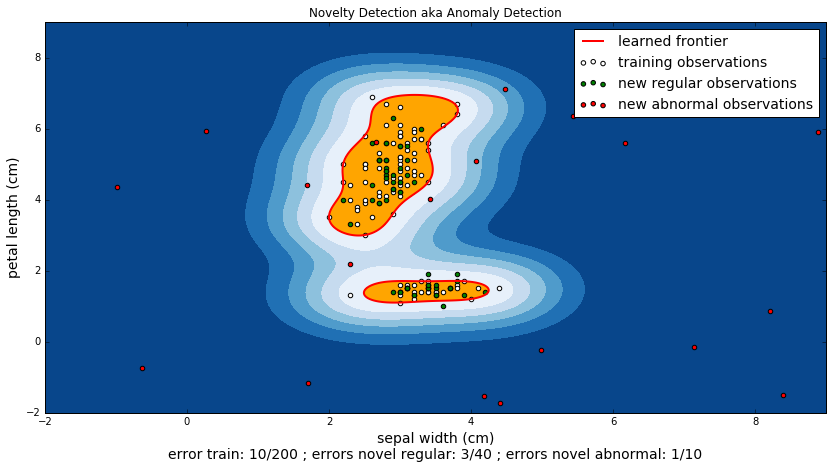

In [3]:
%matplotlib inline
from matplotlib import rcParams, font_manager
rcParams['figure.figsize'] = (14.0, 7.0)
fprop = font_manager.FontProperties(size=14)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

xx, yy = np.meshgrid(np.linspace(-2, 9, 500), np.linspace(-2,9, 500))

# Iris data
iris = load_iris()
X, y = iris.data, iris.target
labels = iris.feature_names[1:3]
X = X[:, 1:3]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# make some outliers
X_weird = np.random.uniform(low=-2, high=9, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=1, random_state = 0)
clf.fit(X_train)

# predict labels
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_weird)


n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection aka Anomaly Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_weird[:, 0], X_weird[:, 1], c='red')
plt.axis('tight')
plt.xlim((-2, 9))
plt.ylim((-2, 9))
plt.ylabel(labels[1], fontsize = 14)
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="best",
           prop=fprop)
plt.xlabel(
    "%s\nerror train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/10"
    % (labels[0], n_error_train, n_error_test, n_error_outliers), fontsize = 14)


TRY changing the value of the parameters in the SVM classifier above especially `gamma`.  More information on `gamma` and support vector machine classifiers [here](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

Created by a Microsoft Employee.
	
The MIT License (MIT)<br>
Copyright (c) 2016 Micheleen Harris